In [40]:
import pandas as pd
import numpy as np
from math import *

data = pd.read_csv('AmesHousing.txt', delimiter='\t')

In [2]:
train = data.iloc[0:1460]
test = data.iloc[1460:]

In [7]:
data

Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0         1  526301100           20        RL         141.0     31770   Pave   
1         2  526350040           20        RH          80.0     11622   Pave   
2         3  526351010           20        RL          81.0     14267   Pave   
3         4  526353030           20        RL          93.0     11160   Pave   
4         5  527105010           60        RL          74.0     13830   Pave   
5         6  527105030           60        RL          78.0      9978   Pave   
6         7  527127150          120        RL          41.0      4920   Pave   
7         8  527145080          120        RL          43.0      5005   Pave   
8         9  527146030          120        RL          39.0      5389   Pave   
9        10  527162130           60        RL          60.0      7500   Pave   
10       11  527163010           60        RL          75.0     10000   Pave   
11       12  527165230           20        RL           NaN      7980   Pave   
12       13  527166040           60        RL          63.0      8402   Pave   
13       14  527180040           20        RL          85.0     10176   Pave   
14       15  527182190          120        RL           NaN      6820   Pave   
15       16  527216070           60        RL          47.0     53504   Pave   
16       17  527225035           50        RL         152.0     12134   Pave   
17       18  527258010           20        RL          88.0     11394   Pave   
18       19  527276150           20        RL         140.0     19138   Pave   
19       20  527302110           20        RL          85.0     13175   Pave   
20       21  527358140           20        RL         105.0     11751   Pave   
21       22  527358200           85        RL          85.0     10625   Pave   
22       23  527368020           60        FV           NaN      7500   Pave   
23       24  527402200           20        RL           NaN     11241   Pave   
24       25  527402250           20        RL           NaN     12537   Pave   
25       26  527403020           20        RL          65.0      8450   Pave   
26       27  527404120           20        RL          70.0      8400   Pave   
27       28  527425090           20        RL          70.0     10500   Pave   
28       29  527427230          120        RH          26.0      5858   Pave   
29       30  527451180          160        RM          21.0      1680   Pave   
...     ...        ...          ...       ...           ...       ...    ...   
2900   2901  916477010           20        RL          95.0     13618   Pave   
2901   2902  921205030           20        RL          88.0     11443   Pave   
2902   2903  921205050           20        RL          88.0     11577   Pave   
2903   2904  923125030           20   A (agr)         125.0     31250   Pave   
2904   2905  923202025           90        RM          78.0      7020   Pave   
2905   2906  923203090          120        RM          32.0      4500   Pave   
2906   2907  923203100          120        RM          32.0      4500   Pave   
2907   2908  923205120           20        RL          90.0     17217   Pave   
2908   2909  923225190          160        RM          41.0      2665   Pave   
2909   2910  923225240          160        RM          41.0      2665   Pave   
2910   2911  923225260          160        RM          42.0      3964   Pave   
2911   2912  923225510           20        RL          58.0     10172   Pave   
2912   2913  923226150           90        RL           NaN     11836   Pave   
2913   2914  923226180          180        RM          21.0      1470   Pave   
2914   2915  923226290          160        RM          21.0      1484   Pave   
2915   2916  923227100           20        RL          80.0     13384   Pave   
2916   2917  923228130          180        RM          21.0      1533   Pave   
2917   2918  923228180          160        RM          21.0      1533   Pave   
2918  

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
Order              2930 non-null int64
PID                2930 non-null int64
MS SubClass        2930 non-null int64
MS Zoning          2930 non-null object
Lot Frontage       2440 non-null float64
Lot Area           2930 non-null int64
Street             2930 non-null object
Alley              198 non-null object
Lot Shape          2930 non-null object
Land Contour       2930 non-null object
Utilities          2930 non-null object
Lot Config         2930 non-null object
Land Slope         2930 non-null object
Neighborhood       2930 non-null object
Condition 1        2930 non-null object
Condition 2        2930 non-null object
Bldg Type          2930 non-null object
House Style        2930 non-null object
Overall Qual       2930 non-null int64
Overall Cond       2930 non-null int64
Year Built         2930 non-null int64
Year Remod/Add     2930 non-null int64
Roof Style         29

In [9]:
target = 'SalePrice'

# Régression linéaire simple

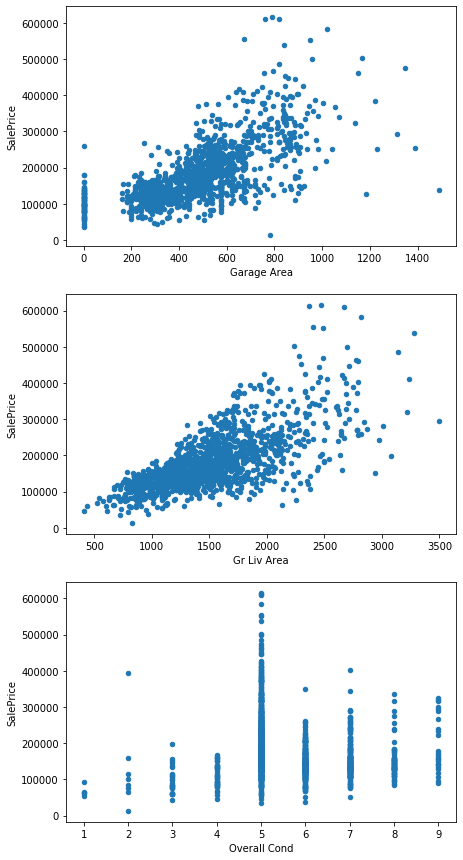

In [29]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(7,15))

ax1 = fig.add_subplot(3,1,1)
ax2 = fig.add_subplot(3,1,2)
ax3 = fig.add_subplot(3,1,3)

train.plot(x='Garage Area', y='SalePrice', ax=ax1, kind='scatter')
train.plot(x='Gr Liv Area', y='SalePrice', ax=ax2, kind='scatter')
train.plot(x='Overall Cond', y='SalePrice', ax=ax3, kind='scatter')

plt.show()

# Méthode des moindres carrés

In [34]:
train.corr().sort_values('SalePrice')

Order       PID  MS SubClass  Lot Frontage  Lot Area  \
PID              0.211255  1.000000    -0.015336     -0.095582  0.022231   
Enclosed Porch   0.013040  0.174018     0.009778     -0.005299  0.002098   
Kitchen AbvGr    0.005159  0.102399     0.299163     -0.004830 -0.029323   
Overall Cond     0.078547  0.109383    -0.099862     -0.059351 -0.010353   
MS SubClass     -0.023140 -0.015336     1.000000     -0.461942 -0.248209   
Order            1.000000  0.211255    -0.023140     -0.017356  0.020064   
Low Qual Fin SF  0.016425  0.051805    -0.001077     -0.008366 -0.013667   
Bsmt Half Bath   0.031690 -0.012051    -0.005866     -0.040562  0.001598   
Yr Sold         -0.929948  0.101723     0.000161      0.003757 -0.004406   
Mo Sold          0.239654 -0.065338    -0.007870      0.002760  0.001255   
Misc Val        -0.020449 -0.005212    -0.023721      0.017888  0.025428   
BsmtFin SF 2     0.008770 -0.005603    -0.093987      0.033690  0.141237   
3Ssn Porch       0.006725 -0.042926    -0.051771      0.052638  0.022090   
Screen Porch     0.026088 -0.023127    -0.065956      0.048045  0.054119   
Bedroom AbvGr    0.014836 -0.005369    -0.024091      0.245220  0.135366   
Pool Area        0.020716 -0.023739    -0.022696      0.047038  0.010442   
Bsmt Unf SF     -0.022334 -0.069772    -0.121685      0.116646  0.002351   
2nd Flr SF       0.011011  0.026015     0.342229     -0.042699  0.005407   
Half Bath       -0.057901 -0.176625     0.223105     -0.000709  0.011162   
Lot Area         0.020064  0.022231    -0.248209      0.417117  1.000000   
Bsmt Full Bath  -0.041538 -0.051738    -0.024823      0.134747  0.133756   
Wood Deck SF    -0.064436 -0.036096    -0.034953      0.085891  0.110003   
Open Porch SF    0.035471 -0.065553     0.000592      0.110214  0.044313   
Lot Frontage    -0.017356 -0.095582    -0.461942      1.000000  0.417117   
TotRms AbvGrd   -0.029653 -0.068487     0.054067      0.329990  0.205604   
Fireplaces      -0.055643 -0.118990    -0.064293      0.245362  0.232112   
BsmtFin SF 1    -0.057940 -0.159380    -0.080354      0.208376  0.160831   
Mas Vnr Area    -0.033111 -0.274563     0.004243      0.221219  0.080765   
Full Bath       -0.074932 -0.187754     0.168263      0.145388  0.107753   
Year Remod/Add  -0.066825 -0.156529     0.050451      0.085869  0.023912   
Garage Yr Blt   -0.112115 -0.302932     0.101580      0.073000  0.004230   
Year Built      -0.126358 -0.388924     0.031562      0.113130  0.031821   
1st Flr SF      -0.060288 -0.190878    -0.273248      0.445633  0.295995   
Garage Area     -0.051493 -0.235411    -0.110141      0.317683  0.179216   
Garage Cars     -0.058123 -0.266705    -0.046967      0.283374  0.166939   
Total Bsmt SF   -0.079007 -0.237455    -0.242671      0.341188  0.224795   
Gr Liv Area     -0.036472 -0.123436     0.089580      0.329567  0.239224   
Overall Qual    -0.049116 -0.276886     0.054533      0.189030  0.100290   
SalePrice       -0.068181 -0.259920    -0.088504      0.365075  0.274730   

                 Overall Qual  Overall Cond  Year Built  Year Remod/Add  \
PID                 -0.276886      0.109383   -0.388924       -0.156529   
Enclosed Porch      -0.173024      0.052764   -0.404219       -0.227862   
Kitchen AbvGr       -0.175562     -0.095837   -0.154059       -0.148992   
Overall Cond        -0.083581      1.000000   -0.355129        0.084612   
MS SubClass          0.054533     -0.099862    0.031562        0.050451   
Order               -0.049116      0.078547   -0.126358       -0.066825   
Low Qual Fin SF     -0.070362     -0.015807   -0.146877       -0.074119   
Bsmt Half Bath      -0.059185      0.099135   -0.037432       -0.051572   
Yr Sold             -0.072218     -0.035198   -0.001975       -0.009300   
Mo Sold             -0.001169      0.017628   -0.020661       -0.019212   
Misc Val            -0.009641      0.047354   -0.028589       -0.020871   
BsmtFin SF 2        -0.044904      0.047058   -0.021794       -0.039878   
3Ssn

# Entraîner un modèle de régression linéaire avec Scikit-learn

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression()

lr.fit(train[['Gr Liv Area']], train['SalePrice'])

a1 = lr.coef_
a0 = lr.intercept_

In [37]:
print(a1)
print(a0)

[116.86624683]
5366.821710056043


# Faire des prédictions

In [43]:
from sklearn.metrics import mean_squared_error
lr_train = LinearRegression()

lr.fit(train[['Gr Liv Area']], train['SalePrice'])

train_prediction = lr.predict(train[['Gr Liv Area']])
test_prediction = lr.predict(test[['Gr Liv Area']])

a1= lr.coef_
a0 = lr.intercept_

train_mse = mean_squared_error(train_prediction, train['SalePrice'])
test_mse = mean_squared_error(test_prediction, test['SalePrice'])

train_rmse = sqrt(train_mse)
test_rmse = sqrt(test_mse)

print(train_rmse)
print(test_rmse)

56034.362001412796
57088.25161263909


# Régression linéaire multiple

In [45]:
lr = LinearRegression()
cols = ['Overall Cond', 'Gr Liv Area']

lr.fit(train[cols], train['SalePrice'])

train_prediction = lr.predict(train[cols])
test_prediction = lr.predict(test[cols])

train_rmse_2 = sqrt(mean_squared_error(train['SalePrice'], train_prediction))
test_rmse_2 = sqrt(mean_squared_error(test['SalePrice'], test_prediction))

print(train_rmse_2)
print(test_rmse_2)

56032.39801525867
57066.90779448559
